# Basic Concepts

### GraphAreaPlot

Manim Community v0.19.0

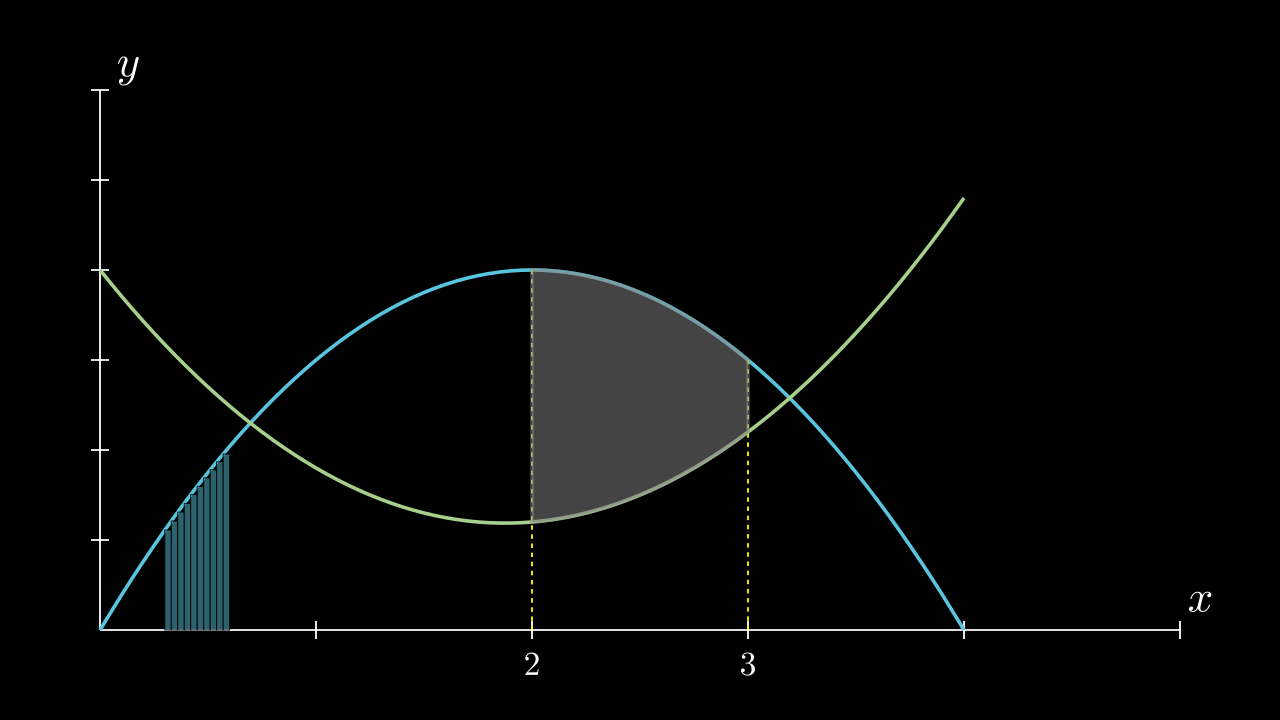

In [3]:
from manim import *

class GraphAreaPlot(Scene):
    def construct(self):
        ax = Axes(
            x_range=[0, 5],
            y_range=[0, 6],
            x_axis_config={"numbers_to_include": [2, 3]},
            tips=False,
        )

        labels = ax.get_axis_labels()

        curve_1 = ax.plot(lambda x: 4 * x - x ** 2, x_range=[0, 4], color=BLUE_C)
        curve_2 = ax.plot(
            lambda x: 0.8 * x ** 2 - 3 * x + 4,
            x_range=[0, 4],
            color=GREEN_B,
        )

        line_1 = ax.get_vertical_line(ax.input_to_graph_point(2, curve_1), color=YELLOW)
        line_2 = ax.get_vertical_line(ax.i2gp(3, curve_1), color=YELLOW)

        riemann_area = ax.get_riemann_rectangles(curve_1, x_range=[0.3, 0.6], dx=0.03, color=BLUE, fill_opacity=0.5)
        area = ax.get_area(curve_2, [2, 3], bounded_graph=curve_1, color=GREY, opacity=0.5)

        self.add(ax, labels, curve_1, curve_2, line_1, line_2, riemann_area, area)



# don't remove below command for run button to work
%manim -qm -v WARNING GraphAreaPlot

In [ ]:
### 

In [4]:
from manim import *

class PolygonOnAxes(Scene):
    def get_rectangle_corners(self, bottom_left, top_right):
        return [
            (top_right[0], top_right[1]),
            (bottom_left[0], top_right[1]),
            (bottom_left[0], bottom_left[1]),
            (top_right[0], bottom_left[1]),
        ]

    def construct(self):
        ax = Axes(
            x_range=[0, 10],
            y_range=[0, 10],
            x_length=6,
            y_length=6,
            axis_config={"include_tip": False},
        )

        t = ValueTracker(5)
        k = 25

        graph = ax.plot(
            lambda x: k / x,
            color=YELLOW_D,
            x_range=[k / 10, 10.0, 0.01],
            use_smoothing=False,
        )

        def get_rectangle():
            polygon = Polygon(
                *[
                    ax.c2p(*i)
                    for i in self.get_rectangle_corners(
                        (0, 0), (t.get_value(), k / t.get_value())
                    )
                ]
            )
            polygon.stroke_width = 1
            polygon.set_fill(BLUE, opacity=0.5)
            polygon.set_stroke(YELLOW_B)
            return polygon

        polygon = always_redraw(get_rectangle)

        dot = Dot()
        dot.add_updater(lambda x: x.move_to(ax.c2p(t.get_value(), k / t.get_value())))
        dot.set_z_index(10)

        self.add(ax, graph, dot)
        self.play(Create(polygon))
        self.play(t.animate.set_value(10))
        self.play(t.animate.set_value(k / 10))
        self.play(t.animate.set_value(5))



# don't remove below command for run button to work
%manim -qm -v WARNING PolygonOnAxes

Manim Community v0.19.0

### SineCurveUnitCircle

In [6]:
from manim import *

class SineCurveUnitCircle(Scene):
    # contributed by heejin_park, https://infograph.tistory.com/230
    def construct(self):
        self.show_axis()
        self.show_circle()
        self.move_dot_and_draw_curve()
        self.wait()

    def show_axis(self):
        x_start = np.array([-6,0,0])
        x_end = np.array([6,0,0])

        y_start = np.array([-4,-2,0])
        y_end = np.array([-4,2,0])

        x_axis = Line(x_start, x_end)
        y_axis = Line(y_start, y_end)

        self.add(x_axis, y_axis)
        self.add_x_labels()

        self.origin_point = np.array([-4,0,0])
        self.curve_start = np.array([-3,0,0])

    def add_x_labels(self):
        x_labels = [
            MathTex(r"\pi"), MathTex(r"2 \pi"),
            MathTex(r"3 \pi"), MathTex(r"4 \pi"),
        ]

        for i in range(len(x_labels)):
            x_labels[i].next_to(np.array([-1 + 2*i, 0, 0]), DOWN)
            self.add(x_labels[i])

    def show_circle(self):
        circle = Circle(radius=1)
        circle.move_to(self.origin_point)
        self.add(circle)
        self.circle = circle

    def move_dot_and_draw_curve(self):
        orbit = self.circle
        origin_point = self.origin_point

        dot = Dot(radius=0.08, color=YELLOW)
        dot.move_to(orbit.point_from_proportion(0))
        self.t_offset = 0
        rate = 0.25

        def go_around_circle(mob, dt):
            self.t_offset += (dt * rate)
            # print(self.t_offset)
            mob.move_to(orbit.point_from_proportion(self.t_offset % 1))

        def get_line_to_circle():
            return Line(origin_point, dot.get_center(), color=BLUE)

        def get_line_to_curve():
            x = self.curve_start[0] + self.t_offset * 4
            y = dot.get_center()[1]
            return Line(dot.get_center(), np.array([x,y,0]), color=YELLOW_A, stroke_width=2 )


        self.curve = VGroup()
        self.curve.add(Line(self.curve_start,self.curve_start))
        def get_curve():
            last_line = self.curve[-1]
            x = self.curve_start[0] + self.t_offset * 4
            y = dot.get_center()[1]
            new_line = Line(last_line.get_end(),np.array([x,y,0]), color=YELLOW_D)
            self.curve.add(new_line)

            return self.curve

        dot.add_updater(go_around_circle)

        origin_to_circle_line = always_redraw(get_line_to_circle)
        dot_to_curve_line = always_redraw(get_line_to_curve)
        sine_curve_line = always_redraw(get_curve)

        self.add(dot)
        self.add(orbit, origin_to_circle_line, dot_to_curve_line, sine_curve_line)
        self.wait(8.5)

        dot.remove_updater(go_around_circle)



# don't remove below command for run button to work
%manim -qm -v WARNING SineCurveUnitCircle

Manim Community v0.19.0